# Predicting Age-Adjusted Diabetes Mortality Rates by County

In [1]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

alz = pd.read_csv('/Users/deniseremhof/Desktop/alz_oct_11.csv')
alz = alz.drop('Unnamed: 0', axis=1)

In [2]:
from sklearn.ensemble import RandomForestRegressor
## Define y
y = alz['dia_death_rate']

## Define X
columns_ = alz.columns.tolist()
exclude_cols = ['dia_death_rate','county_name','FIPS','State']
X = alz[[i for i in columns_ if i not in exclude_cols]]

## Print shapes of y and X
print y.shape, X.shape

(2701,) (2701, 139)


#### Train/test split, gridsearch optimal parameters, and fit the model

In [3]:
## Train test split 70/30
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(1890, 139) (1890,)
(811, 139) (811,)


In [4]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor( )

params = {'max_depth':[2,3,4,5,6,None], 
          'max_features':['sqrt','log2'],
          'min_samples_split':[2,4,8,16,32,64,128],
          'n_estimators': [500]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=1, cv=5, verbose=2)

In [5]:
model = estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 -   1.3s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 -   1.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 -   1.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 -   1.4s
[CV] max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=2, n_estimators=500, max_depth=2 -   1.3s
[CV] max_features=sqrt, min_samples_split=4, n_estimators=500, max_depth=2 
[CV]  max_features=sqrt, min_samples_split=4, n_estimator

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:   52.7s


[CV]  max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 -   1.3s
[CV] max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 -   1.2s
[CV] max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 -   1.2s
[CV] max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 -   1.2s
[CV] max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_samples_split=4, n_estimators=500, max_depth=2 -   1.2s
[CV] max_features=log2, min_samples_split=8, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_samples_split=8, n_estimators=500, max_depth=2 -   1.2s
[CV] max_features=log2, min_samples_split=8, n_estimators=500, max_depth=2 
[CV]  max_features=log2, min_sampl

[Parallel(n_jobs=1)]: Done 161 tasks       | elapsed:  3.7min


[CV]  max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 -   1.5s
[CV] max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 
[CV]  max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 -   1.5s
[CV] max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 
[CV]  max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 -   1.5s
[CV] max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 
[CV]  max_features=sqrt, min_samples_split=32, n_estimators=500, max_depth=4 -   1.6s
[CV] max_features=sqrt, min_samples_split=64, n_estimators=500, max_depth=4 
[CV]  max_features=sqrt, min_samples_split=64, n_estimators=500, max_depth=4 -   1.5s
[CV] max_features=sqrt, min_samples_split=64, n_estimators=500, max_depth=4 
[CV]  max_features=sqrt, min_samples_split=64, n_estimators=500, max_depth=4 -   1.5s
[CV] max_features=sqrt, min_samples_split=64, n_estimators=500, max_depth=4 
[CV]  max_features=sqr

[Parallel(n_jobs=1)]: Done 364 tasks       | elapsed:  9.2min


[CV]  max_features=sqrt, min_samples_split=8, n_estimators=500, max_depth=None -   2.7s
[CV] max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None 
[CV]  max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None -   2.5s
[CV] max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None 
[CV]  max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None -   2.5s
[CV] max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None 
[CV]  max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None -   2.5s
[CV] max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None 
[CV]  max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None -   2.5s
[CV] max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None 
[CV]  max_features=sqrt, min_samples_split=16, n_estimators=500, max_depth=None -   2.7s
[CV] max_features=sqrt, min_samples_split=32, n_estimators=500, max

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 11.2min finished


### Best parameters, estimators, and score

About this....

In [6]:
## Print best estimator, best parameters, and best score
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 500, 'max_depth': None}


best score 0.377162525558


### Mean-squared error and R^2

Explain what this is...
-how much of the variance can be explained by this model

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = estimator_rfr.predict(X_train)
y_test_pred = estimator_rfr.predict(X_test)

print('MSE train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 8.80, test: 61.05
R^2 train: 0.89, test: 0.35


In [8]:
cols = X.columns

r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

/Users/deniseremhof/anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


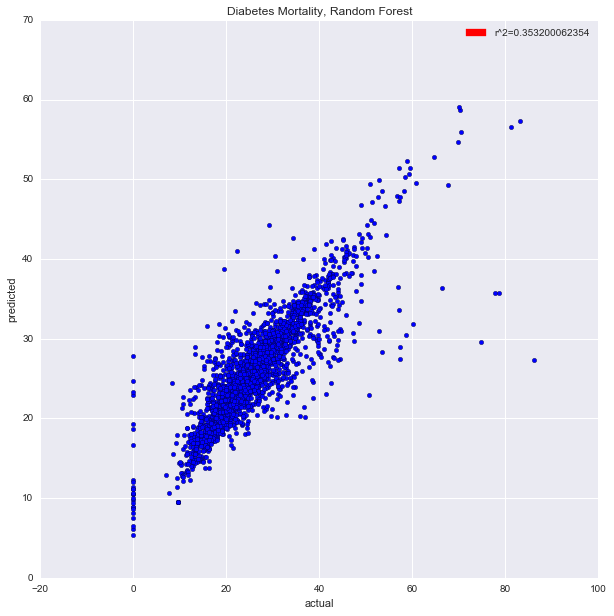

In [9]:
# plt.figure(figsize = (10,10))
# plt.scatter(y, rfr_best.predict(X[cols]))
# import matplotlib.patches as mpatches
# plt.plot(legend="r^2=" + str(r2))
# plt.legend(loc="lower right")
# red_patch = mpatches.Patch(color='red', label="r^2=" + str(r2))
# plt.legend(handles=[red_patch])
# plt.title("Diabetes Mortality, Random Forest")
# plt.xlabel("actual")
# plt.ylabel("predicted")
# plt.show()

plt.figure(figsize = (10,10))
plt.scatter(y, rfr_best.predict(X[cols]))
import matplotlib.patches as mpatches
plt.plot(legend="r^2=" + str(r2))
plt.legend(loc="lower right")
red_patch = mpatches.Patch(color='red', label="r^2=" + str(r2))
plt.legend(handles=[red_patch])
plt.title("Diabetes Mortality, Random Forest")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

### Plot Residuals to look for bias

In [10]:
yhat = rfr_best.predict(X)

resid = y - yhat

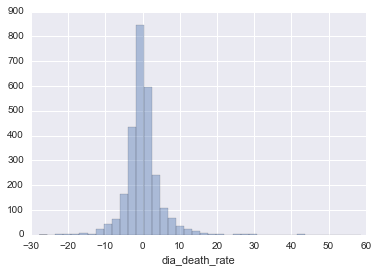

In [11]:
sns.distplot(resid, bins=40, hist=True, kde=False)
plt.show()

### Random Forest Feature Importances

In [12]:
## Print Feature importances
feature_importance = pd.DataFrame({ 'feature':X.columns, 
                                   'importance':rfr_best.feature_importances_
                                  })

feature_importance.sort_values('importance', ascending=False, inplace=True)
feature_importance.reset_index(inplace=True)

In [13]:
feature_importance.feature.dtypes
feature_importance['feature'] = map(lambda x: str(x), feature_importance.feature.values)
feature_importance['importance'] = map(lambda x: float(x), feature_importance.importance.values)

In [14]:
feature_importance[feature_importance['importance'] > 0]

,index,feature,importance
0,70,mortality_rate,0.061258
1,68,per_capita_income,0.036785
2,42,poverty_rate,0.034505
3,7,snap_per_capita,0.033731
4,44,child_poverty_rate,0.030867
5,33,pct_white,0.030477
6,41,median_hh_income,0.025429
7,138,college_plus,0.024731
8,134,no_high_school,0.024667
9,67,inactivity_rate,0.023448


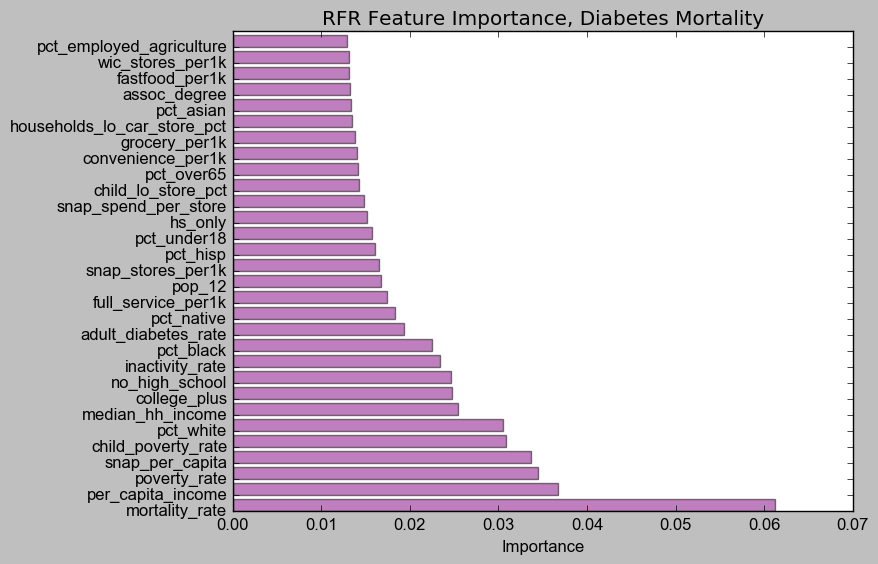

In [15]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


# Example data
features = feature_importance.feature[:30]
y_pos = np.arange(len(features))
importance = feature_importance.importance[:30]
error = np.random.rand(len(features))

plt.barh(y_pos, importance, alpha=0.5, color = 'purple')
plt.yticks(y_pos, features)
plt.xlabel('Importance')
plt.title("RFR Feature Importance, Diabetes Mortality")

plt.show()